# 5. Z-test for the equality of two proportions (binomial distribution)

## Objective

- To investigate the assumption that the proportions $\hat{p_1}$ and $\hat{p_2}$ of elements from two populations are equal, based on two samples, one from each population.

- In layman's terms:
    - Assume I have two populations
    
    - I draw $n_1$ observations from population 1, and using this, I compute $\hat{p_1}$ (the proportion of 1s in my sample)

    - I draw $n_2$ observations from population 2, and using this, I compute $\hat{p_2}$

    - I want to know test if $\hat{p_1} = \hat{p_2}$ 

## Assumptions

- Assumes that the number of observations in both the samples are large (i.e. $n_1 \ge 30$, $n_2 \ge 30$) to justify the normal approximation to the binomial
    - i.e. $\hat{p}$ is normally distributed I.F.F. you take a sufficient sample $n$ by central limit theorem

## Method

- Take sample $n_1$ from population 1, and $n_2$ from population 2
- Compute $\hat{p_1}$ and $\hat{p_2}$

- Let's define the pooled proportion (basically just taking a sample-weighted average of the 2 proportions) to be 

$$\begin{aligned}
    p_{pooled} &= \frac{\hat{p_1} n_1 + \hat{p_2} n_2}{n_1 + n_2}
\end{aligned}$$

- The test statistic is 
$$\begin{aligned}
    Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{p_{pooled} \cdot (1 - p_{pooled}) \cdot (\frac{1}{n_1} + \frac{1}{n_2})}}
\end{aligned}$$

### Proof that the test statistic is Gaussian

## Example

- Problem
    - Two random samples are taken from two populations representing two production processes for clock mechanisms
    - The first sample has size $n_1 = 952$, and the proportion of mechanisms with bad accuracy is $\hat{p_1} = 0.325\%$. 
    - The second sample has size $n_2 = 1168$, and the proportion of mechanisms with bad accuracy is $\hat{p_2} = 5.73\%$. 

- Question
    - Do the two populations of clock mechanisms have different quality? (two-tailed test)
    - Is quality of process 1 better/worse than process 2 (one-tailed test)?

In [11]:
n1 = 952
n2 = 1168
phat1 = 0.00325
phat2 = 0.0573

def compute_ppool(n1, n2, phat1, phat2):
    return ((n1 * phat1) + (n2 * phat2)) / (n1 + n2)

def compute_z_statistic(n1, n2, phat1, phat2):
    ppool = compute_ppool(n1, n2, phat1, phat2)
    z = (phat1 - phat2) / ((ppool * (1-ppool) * (1/n1 + 1/n2))**0.5)
    return z

compute_z_statistic(n1, n2, phat1, phat2)

-6.926541825079652

## Proof by simulation that test statistic is normal

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

P = 0.5
SAMPLE_SIZE1 = 40
SAMPLE_SIZE2 = 40

pbar1 = np.random.binomial(SAMPLE_SIZE1, P, size=10_000)/SAMPLE_SIZE1
pbar2 = np.random.binomial(SAMPLE_SIZE2, P, size=10_000)/SAMPLE_SIZE2

P_POOLED = ((pbar1*SAMPLE_SIZE1) + (pbar2*SAMPLE_SIZE2)) / (SAMPLE_SIZE1+SAMPLE_SIZE2)

-0.005709060075268251
0.9957082047669342


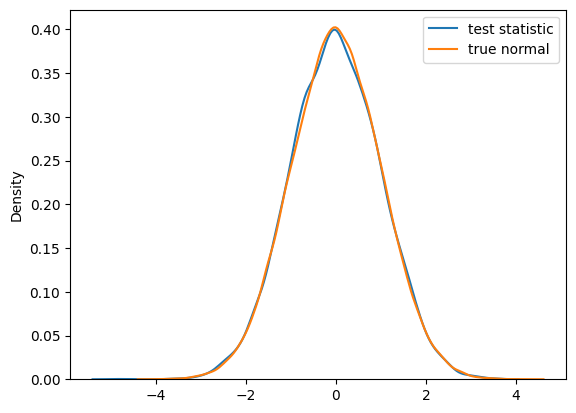

In [12]:
test_statistic_distribution = (
    (pbar1 - pbar2) / (P_POOLED * (1 - P_POOLED) * (1/SAMPLE_SIZE1 + 1/SAMPLE_SIZE2))**0.5
)
true_normal_distribution = np.random.normal(0, 1, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='true normal')
plt.legend()
# test_statistic_distribution